## Importing the Required Libraries

In [100]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

## Loading the data(CSV) file :
* In this file contain some missing values in from of '?' so at import time we have to change into 'NAN'

In [2]:
df = pd.read_csv("adult.csv",na_values=['?'])

## Data Analysis :

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
original_df=df.shape[0]
print("Number of rows in the data set :",df.shape[0])
print("Number of columns in the data set :",df.shape[1])

Number of rows in the data set : 48842
Number of columns in the data set : 15


## Handling Missing Values  :


In [5]:
print(df.isnull().sum())
print("\nTotal missing values in Dataframe :",df.isnull().sum().sum())

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

Total missing values in Dataframe : 6465


**OBSERVATION**
* workclass's null value is 2799
* occupation's null value is 2809
* native-country's null value is 857
* Total null values in dataframe are 6465

**Droping those row which contain null values**

In [6]:
df.dropna(inplace=True)

**Removing column fnlwgt**

In [7]:
df.drop('fnlwgt', axis = 1, inplace=True)
df

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
print("Number of rows in the data set :",df.shape[0])
print("Number of columns in the data set :",df.shape[1])

Number of rows in the data set : 45222
Number of columns in the data set : 14


**OBSERVATION :** after removing null values 3620 rows are deleted and 1 worthless column is removed. 


In [9]:
round((100*(original_df-len(df.index))/original_df),3)

7.412

**OBSERVATION :** 7.412% of data is removed as it was worthless

## Data Preparation

**All numerical columns :**

In [10]:
numerical = df.select_dtypes(include=['int64', 'float64'])
numerical.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
5,34,6,0,0,30


**All Categorical columns :**

In [11]:
categorical = df.select_dtypes(include=['object'])
categorical.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


**Number of unique values in each categorical column**

In [12]:
Dict={}
total=0
for i in categorical:
  Dict[i] = len(df[i].unique())
  total+=Dict[i]
col_df=pd.DataFrame.from_dict(Dict,orient='index',columns=['No. of unique values in each categorical column'])
col_df

,No. of unique values in each categorical column
workclass,7
education,16
marital-status,7
occupation,14
relationship,6
race,5
gender,2
native-country,41
income,2


In [13]:
print("Total no. of unique values in catergorial columns:",total)

Total no. of unique values in catergorial columns: 100


**Scaling the numerical features :**

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_num = pd.DataFrame(scaler.fit_transform(numerical), columns = numerical.columns)
df_num.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942


**Encoding Categorical data :**

In [15]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder is use to transfrom the all categorical columns into its unique values
encoder = OneHotEncoder(drop='first', sparse=False)
df_cat = pd.DataFrame(encoder.fit_transform(categorical), columns=encoder.get_feature_names(categorical.columns))
df_cat.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,...,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**OBSEVARTION :** After encoding **9** categorical columns converted into **91** columns

**Concatenation of Numerical and Categorical columns**

In [16]:
adult = pd.concat([df_num, df_cat], axis=1)
adult.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,...,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**OBSERVATION :** After data preparation we have **96** columns

**Changing the name of columns**

In [17]:
adult=adult.rename(columns={"gender_Male":"gender"})
adult=adult.rename(columns={"income_>50K":"income"})
adult

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,...,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,-0.873671,0.737034,-0.146733,-0.21878,-0.244684,0.0,1.0,0.0,0.0,0.0,0.0,0.0

**NOTE :**
* In income and gender.
  * In gender column : '0.0' is for male and '0.1' is for female.
  * In income column : '0.0' is for <=50K and '0.1' is for >50K.

**Preparing dataset Y as target value and X as remaining values.**

In [18]:
Y = adult['income']
X = adult.drop('income',axis=1)

**Split dataset into train and test with 70% and 30% respetively.**

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.25, random_state = 100)

In [20]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(33916, 95) (33916,)
(11306, 95) (11306,)


### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

# no. of columns use : 95
# max_iter=250

classifier_log = LogisticRegression(max_iter=250)
classifier_log.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_pred = classifier_log.predict(X_test)

In [23]:
from sklearn import metrics
Logistic_reg=metrics.accuracy_score(Y_test, y_pred)
Logistic_reg

0.8511409870865028

**OBSERVATION :** Accuracy of Logistic Regression with 95 columns : 85.11%

In [24]:
pred_prob_LR = classifier_log.predict_proba(X_test)
np.around(pred_prob_LR, decimals = 2)

array([[0.9 , 0.1 ],
       [0.65, 0.35],
       [0.74, 0.26],
       ...,
       [0.95, 0.05],
       [0.95, 0.05],
       [0.95, 0.05]])

In [25]:
con_metric_LR = metrics.confusion_matrix(Y_test, y_pred)
con_metric_LR

array([[7931,  584],
       [1099, 1692]])

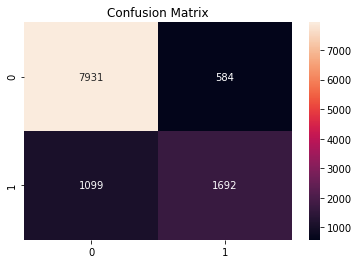

In [26]:
sb.heatmap(con_metric_LR, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

**OBSERVATION :** 
* Correct predicted vaules : 7931+1692 = 9627
* Incorrected preducted values : 1099+584 =1683

In [27]:
print(metrics.classification_report(Y_test,y_pred))
# columns use = 95

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90      8515
         1.0       0.74      0.61      0.67      2791

    accuracy                           0.85     11306
   macro avg       0.81      0.77      0.79     11306
weighted avg       0.84      0.85      0.85     11306



### K-Nearest Neighbors

In [28]:
from sklearn.neighbors import KNeighborsClassifier
# columns use : 95
# n_neighbors : 9

classifier_knn = KNeighborsClassifier(n_neighbors=9)
classifier_knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [29]:
y_pred = classifier_knn.predict(X_test)

KNN=metrics.accuracy_score(Y_test, y_pred)
KNN

0.8439766495666018

**OBSERVATION :** Accuracy of K-Nearest Neighbors with 95 colmns : 84.39%

In [30]:
pred_prob_knn = classifier_knn.predict_proba(X_test)
np.around(pred_prob_knn, decimals = 2)

array([[1.  , 0.  ],
       [0.44, 0.56],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [31]:
con_metric_knn = metrics.confusion_matrix(Y_test, y_pred)
con_metric_knn

array([[7776,  739],
       [1025, 1766]])

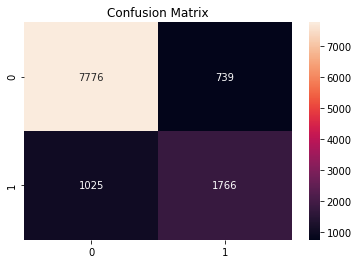

In [32]:
sb.heatmap(con_metric_knn, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

**OBSERVATION :** 
* Correct predicted vaules : 7776+1766 = 9542 
* Incorrected preducted values : 1025+739 = 1764

In [33]:
print(metrics.classification_report(Y_test,y_pred))
# columns use = 95

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90      8515
         1.0       0.70      0.63      0.67      2791

    accuracy                           0.84     11306
   macro avg       0.79      0.77      0.78     11306
weighted avg       0.84      0.84      0.84     11306



### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

# column use :95
# max_depth : 3

classifier_dt = DecisionTreeClassifier(max_depth = 3)
classifier_dt.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [35]:
y_pred = classifier_dt.predict(X_test)

DT=metrics.accuracy_score(Y_test, y_pred)
DT

0.8412347426145409

**OBSERVATION :** Accuracy of Decision tree with 95 colmns : 84.12%

In [36]:
pred_prob_dt = classifier_dt.predict_proba(X_test)
np.around(pred_prob_dt, decimals = 2)

array([[0.69, 0.31],
       [0.69, 0.31],
       [0.69, 0.31],
       ...,
       [0.85, 0.15],
       [0.85, 0.15],
       [0.85, 0.15]])

In [37]:
con_metric_dt = metrics.confusion_matrix(Y_test, y_pred)
con_metric_dt

array([[8085,  430],
       [1365, 1426]])

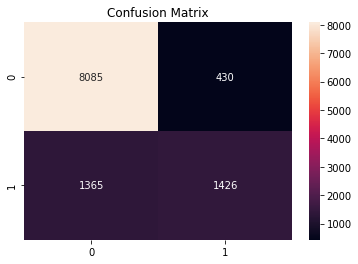

In [38]:
sb.heatmap(con_metric_dt, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

**OBSERVATION :** 
* Correct predicted vaules : 8085+1426 = 9511
* Incorrected preducted values : 1365+430 = 1795

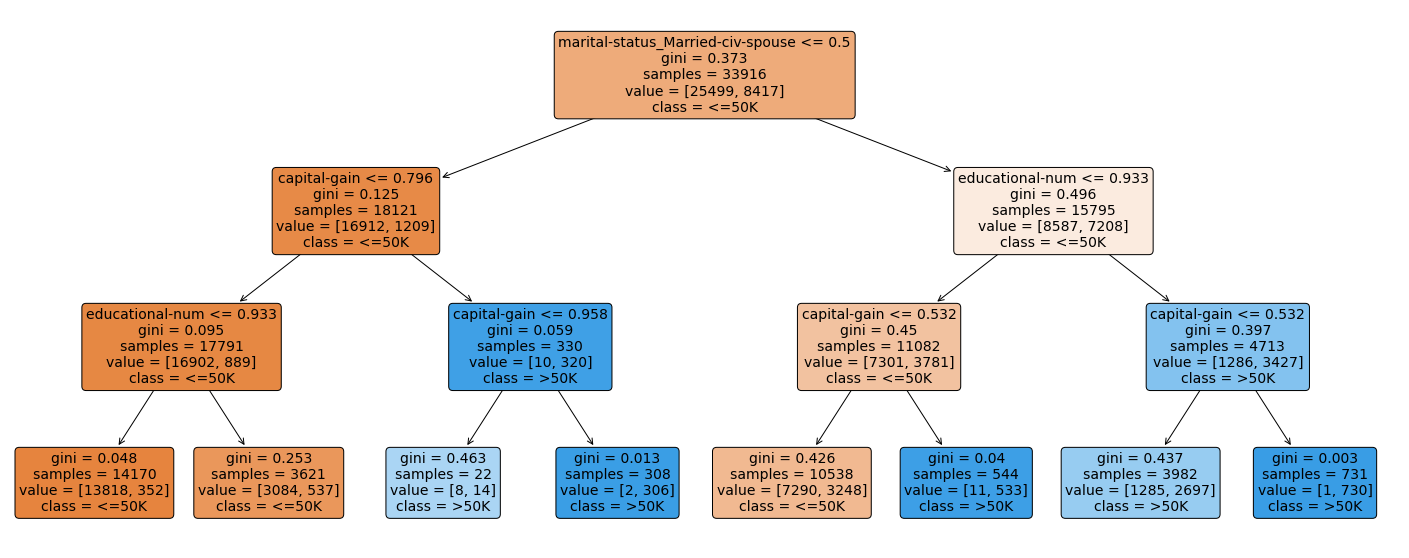

In [39]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
f = plot_tree(classifier_dt, feature_names = X_train.columns, 
              class_names=['<=50K','>50K'] ,
              filled = True, 
              rounded = True, 
              fontsize = 14
             )

In [40]:
print(metrics.classification_report(Y_test,y_pred))
# columns use = 95

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      8515
         1.0       0.77      0.51      0.61      2791

    accuracy                           0.84     11306
   macro avg       0.81      0.73      0.76     11306
weighted avg       0.83      0.84      0.83     11306



### Support Vector Classification

In [41]:
from sklearn.svm import SVC

# columns use : 95

classifier_svc = SVC()
classifier_svc.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
y_pred = classifier_svc.predict(X_test)

SVC_=metrics.accuracy_score(Y_test, y_pred)
SVC_

0.8532637537590659

**OBSERVATION :** Accuracy of Support Vector Classification with 95 colmns : 85.32%

In [43]:
con_metric_svc = metrics.confusion_matrix(Y_test, y_pred)
con_metric_svc

array([[8006,  509],
       [1150, 1641]])

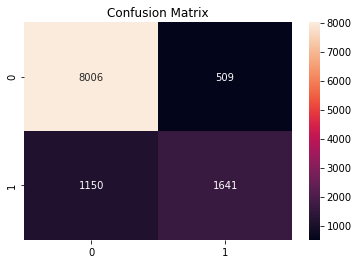

In [44]:
sb.heatmap(con_metric_svc, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

**OBSERVATION :** 
* Correct predicted vaules : 8006+1641 = 9647
* Incorrected preducted values : 1150+509 =1659

In [45]:
print(metrics.classification_report(Y_test,y_pred))
# columns use : 95

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91      8515
         1.0       0.76      0.59      0.66      2791

    accuracy                           0.85     11306
   macro avg       0.82      0.76      0.79     11306
weighted avg       0.85      0.85      0.85     11306



**Accuracy Table (columns : 95)**

In [46]:
d_acc={}
Lable=["Logistic Regression","KNN","Decision Tree","SVC"]
Accuracy=[Logistic_reg,KNN,DT,SVC_]
for i in range(4):
  d_acc[Lable[i]]=round((Accuracy[i]*100),2)
d_acc
acc_df=pd.DataFrame.from_dict(d_acc,orient='index',columns=['Accuracy (col=95)'])
acc_df

,Accuracy (col=95)
Logistic Regression,85.11
KNN,84.40
Decision Tree,84.12
SVC,85.33


**OBSERVATION :** when we taken 95 features SVC and logistic regression have higest accuracy.

## RFE(Recursive Feature Elimination) 
* Recursive Feature Elimination (RFE) as its title suggests recursively removes features, builds a model using the remaining attributes and calculates model accuracy. 

In [47]:
from sklearn.linear_model import LogisticRegression
regressor_rfe = LogisticRegression(max_iter=250)

In [48]:
from sklearn.feature_selection import RFE

rfe = RFE(regressor_rfe, 25)
rfe = rfe.fit(X_train, Y_train)

**OBSERVATION :** We have taken only 25 features rather then 95 features.

In [49]:
temp_df = pd.DataFrame({'Columns' : X_train.columns, 'Included' : rfe.support_, 'Ranking' : rfe.ranking_})
temp_df

,Columns,Included,Ranking
0,age,False,20
1,educational-num,True,1
2,capital-gain,True,1
3,capital-loss,False,33
4,hours-per-week,False,19
...,...,...,...
90,native-country_Thailand,False,10
91,native-country_Trinadad&Tobago,True,1
92,native-country_United-States,False,38
93,native-country_Vietnam,True,1


In [50]:
imp_col = X_train.columns[rfe.support_]
imp_col

Index(['educational-num', 'capital-gain', 'education_1st-4th',
       'education_5th-6th', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Wife', 'gender', 'native-country_Columbia',
       'native-country_Dominican-Republic', 'native-country_El-Salvador',
       'native-country_Guatemala', 'native-country_Mexico',
       'native-country_Peru', 'native-country_Scotland',
       'native-country_South', 'native-country_Trinadad&Tobago',
       'native-country_Vietnam'],
      dtype='object')

**OBSERVATION :** These are that 25 feartues that we use to get good accuracy.

**Put important columns into X_train**

In [51]:
X_train_rfe = X_train[imp_col]
X_train_rfe

,educational-num,capital-gain,education_1st-4th,education_5th-6th,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Other-service,occupation_Priv-house-serv,relationship_Other-relative,relationship_Own-child,relationship_Wife,gender,native-country_Columbia,native-country_Dominican-Republic,native-country_El-Salvador,native-country_Guatemala,native-country_Mexico,native-country_Peru,native-country_Scotland,native-country_South,native-country_Trinadad&Tobago,native-country_Vietnam
4391,-2.004996,-0.146733,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
42047,-0.046403,-0.146733,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18562,-0.438122,-0.146733,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37936,-0.438122,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32942,1.520471,-0.146733,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,-1.613277,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,-0.046403,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12119,-0.438122,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14147,-0.046403,-0.146733,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Put important columns into X_test**

In [52]:
X_test_rfe = X_test[imp_col]
X_test_rfe

,educational-num,capital-gain,education_1st-4th,education_5th-6th,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Other-service,occupation_Priv-house-serv,relationship_Other-relative,relationship_Own-child,relationship_Wife,gender,native-country_Columbia,native-country_Dominican-Republic,native-country_El-Salvador,native-country_Guatemala,native-country_Mexico,native-country_Peru,native-country_Scotland,native-country_South,native-country_Trinadad&Tobago,native-country_Vietnam
40273,-0.046403,-0.146733,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,-0.046403,-0.146733,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1230,-2.396715,0.266650,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25507,-2.396715,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
553,-0.046403,-0.146733,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3700,1.128753,-0.146733,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30164,1.520471,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27551,1.128753,-0.146733,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10019,1.128753,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Logistic Regression after REF :

In [53]:
classifier_rfe = LogisticRegression(max_iter=250)
classifier_rfe.fit(X_train_rfe, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
y_pred_rfe = classifier_rfe.predict(X_test_rfe)

lr_rfe=metrics.accuracy_score(Y_test, y_pred_rfe)
lr_rfe

0.8417654342826818

**OBSERVATION :** Accuracy of Logistic Regression after RFE with 25 colmns : 84.17%

In [55]:
pred_prob_lr = classifier_rfe.predict_proba(X_test_rfe)
np.around(pred_prob_lr, decimals = 2)

array([[0.62, 0.38],
       [0.62, 0.38],
       [0.82, 0.18],
       ...,
       [0.93, 0.07],
       [0.91, 0.09],
       [0.88, 0.12]])

In [56]:
con_metric_lr = metrics.confusion_matrix(Y_test, y_pred_rfe)
con_metric_lr

array([[7922,  593],
       [1196, 1595]])

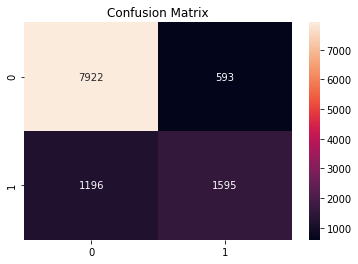

In [57]:
sb.heatmap(con_metric_lr, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

**OBSERVATION :** 
* Correct predicted vaules : 7922+1595 = 9517
* Incorrected preducted values : 1196+593 = 1789

In [58]:
print(metrics.classification_report(Y_test,y_pred_rfe))
# columns use : 25

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90      8515
         1.0       0.73      0.57      0.64      2791

    accuracy                           0.84     11306
   macro avg       0.80      0.75      0.77     11306
weighted avg       0.83      0.84      0.83     11306



**Accuracy Table after RFE (columns = 25)**

In [59]:
rfe_d={"Logistic Regression":round((lr_rfe*100),2)}
df_rfe=pd.DataFrame.from_dict(rfe_d,orient='index',columns=['Accuracy_RFE (col=25)'])
df_rfe

,Accuracy_RFE (col=25)
Logistic Regression,84.18


## PCA (Principal Component Analysis)
* Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance.

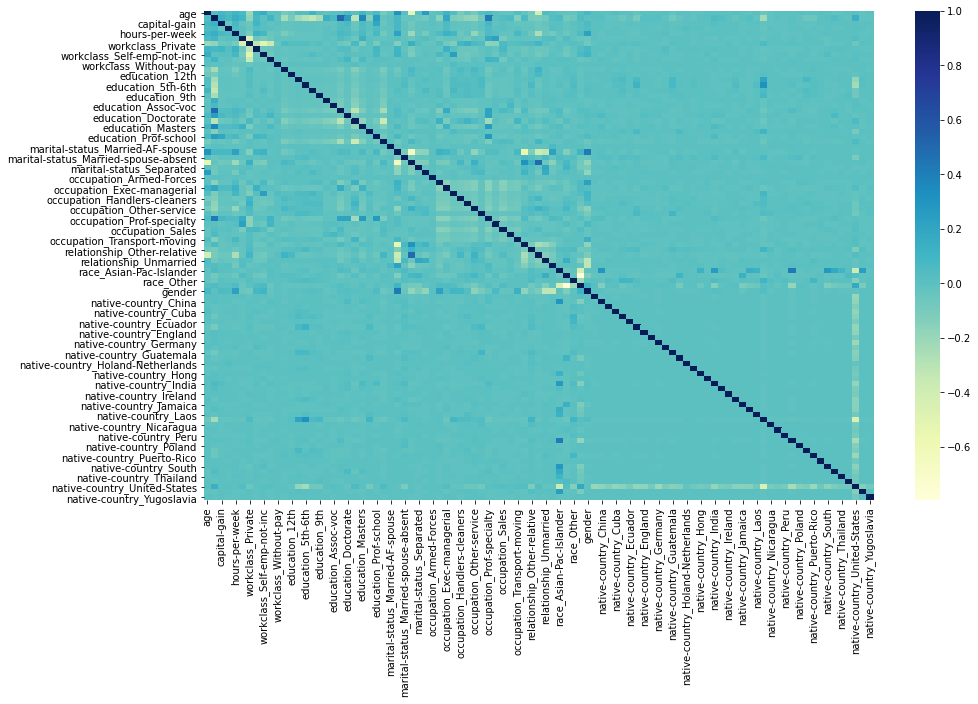

In [60]:
plt.figure(figsize=(15, 9))
sb.heatmap(X_train.corr(), cmap="YlGnBu")
plt.show()

**OBSERVATION :** It shows the correlation of all the independent variables.

In [61]:
from sklearn.decomposition import PCA
pca = PCA()

In [62]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [63]:
pca.components_

array([[ 4.67454193e-01,  4.79410892e-01,  3.34838267e-01, ...,
         1.65819314e-02, -6.01836741e-04, -3.34727040e-05],
       [-6.33917619e-01,  6.34470861e-01,  2.19197405e-01, ...,
         2.25189364e-02,  1.29042540e-04, -1.76712142e-04],
       [ 9.17958357e-02, -1.19176993e-01,  5.81845724e-01, ...,
        -5.58052079e-03, -6.17454474e-05,  1.09119450e-04],
       ...,
       [-8.21743447e-06,  3.46736223e-06, -1.32450287e-05, ...,
        -5.88949480e-02, -5.81291281e-02, -6.18288812e-02],
       [-1.04050287e-05, -5.97605636e-05,  6.07566108e-06, ...,
         1.47867440e-01,  1.44162457e-01,  1.51951963e-01],
       [-3.35694241e-17, -1.20811082e-01, -4.01879956e-17, ...,
        -2.77555756e-17, -1.77809156e-17,  4.73579509e-16]])

In [64]:
np.cumsum(pca.explained_variance_ratio_)

array([0.17231214, 0.29928058, 0.41859915, 0.52288518, 0.62121152,
       0.66781356, 0.69754836, 0.72354624, 0.74943991, 0.77017519,
       0.78875128, 0.80669662, 0.8222957 , 0.83642948, 0.84981652,
       0.8613533 , 0.87204272, 0.88250789, 0.89196213, 0.90045472,
       0.9079432 , 0.91518055, 0.92166351, 0.9276611 , 0.93310102,
       0.93814771, 0.94258311, 0.94674013, 0.95079417, 0.95475762,
       0.95861136, 0.96208182, 0.96547486, 0.96881006, 0.9718258 ,
       0.97417841, 0.97648633, 0.97868178, 0.98059593, 0.98226676,
       0.98385806, 0.98536841, 0.98661583, 0.98783116, 0.98894152,
       0.98994237, 0.99067315, 0.99131579, 0.99191365, 0.9924472 ,
       0.99292544, 0.99335723, 0.99375246, 0.99410984, 0.99446161,
       0.99478634, 0.99509617, 0.99538628, 0.99566147, 0.99591763,
       0.99617243, 0.9964134 , 0.99664952, 0.99688091, 0.99710149,
       0.99731476, 0.99752243, 0.99770572, 0.99788872, 0.99805956,
       0.99822186, 0.99837038, 0.99851495, 0.9986505 , 0.99877

In [65]:
np.arange(len(pca.explained_variance_ratio_))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94])

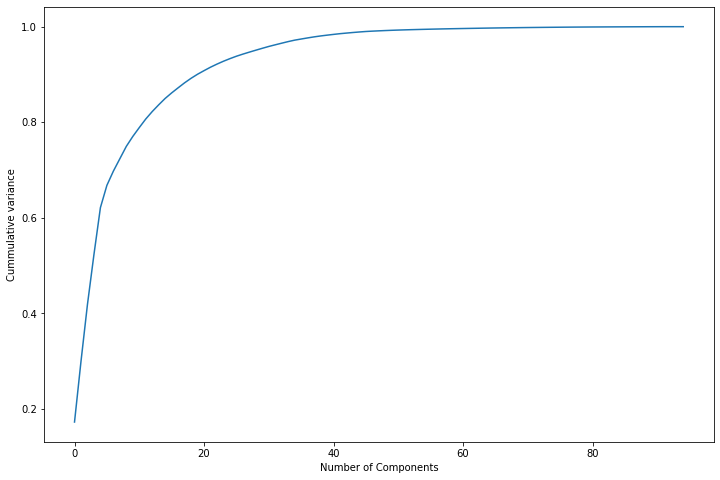

In [66]:
plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cummulative variance')
plt.show()

**OBSERVATION :** 
* As we can see the cummulative variance of columns that which column covers how much data.
* So we take 20 columns that covers 90% of data.

**Fit and transform dataset without income columns.**

In [67]:
pca_new = PCA(n_components = 20)
pca_new_data = pca_new.fit_transform(X)
print("shape = ", pca_new_data.shape)

shape =  (45222, 20)


**Dataframe which contain 20 columns and one column of income name as Label**

In [68]:
pca_df = pd.DataFrame(data=pca_new_data)
pca_df["Label"] = Y.values
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,Label
0,-1.611764,0.084303,0.132258,-0.489360,0.876872,0.099531,0.264801,0.302064,0.019703,1.301264,-0.150848,0.640139,-0.070290,-0.044909,-0.220259,0.010975,-0.482450,-0.414122,-0.335474,-0.302293,0.0
1,0.173045,-0.638399,0.178341,-0.884291,0.348733,-0.529365,-0.549035,-0.017164,-0.141020,-0.152073,-0.100645,-0.062359,-0.004665,0.067701,-0.239197,-0.074910,0.053516,-0.056301,0.120394,-0.190526,0.0
2,0.169250,0.778385,-0.070402,-0.258725,-0.371954,-0.972223,0.108994,0.262109,0.770256,-0.133728,0.287780,-0.297249,-0.003960,-0.013019,-0.092273,-0.263812,-0.007593,-0.193516,-0.322960,0.735528,1.0
3,0.456136,-0.270671,0.748668,0.434336,0.303460,-0.403176,0.690285,0.412622,-0.532517,1.078797,-0.343871,-0.579979,0.123820,0.183934,-0.296840,-0.040091,-0.158975,-0.393182,0.212084,-0.322392,1.0
4,-1.744902,-0.559286,0.231235,0.332217,0.491495,0.530649,0.183021,-0.836288,0.155330,0.205495,0.529974,0.086658,-0.030285,-0.133784,-0.312363,-0.098132,0.680220,-0.123947,-0.395100,0.043713,0.0


**Preparing dataset Y as target value and X as remaining values.**

In [69]:
Y_pca = pca_df['Label']
X_pca = pca_df.drop('Label',axis=1)

**Split dataset into train and test with 70% and 30% respetively.**

In [70]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_pca, Y_pca,test_size = 0.25, random_state = 100)

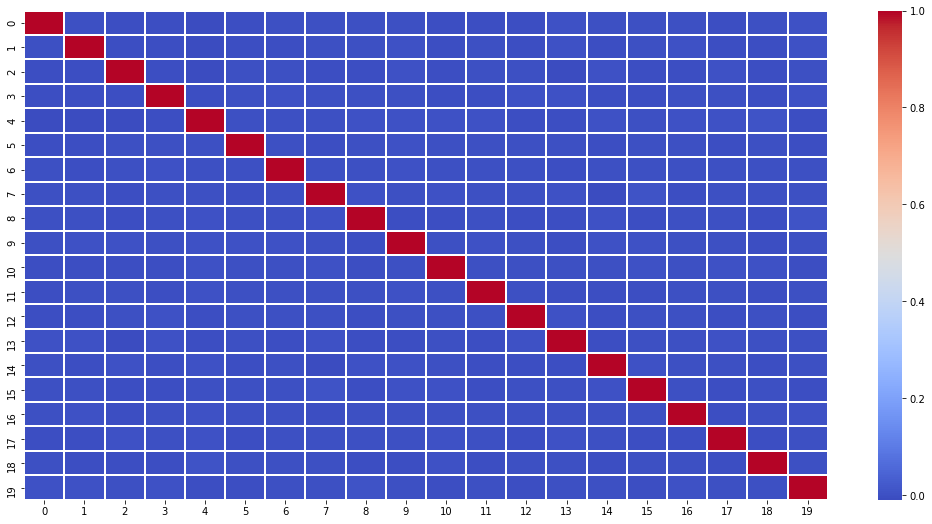

In [71]:
corrmat = np.corrcoef(X_train_pca.T)
plt.figure(figsize=(18, 9))
sb.heatmap(corrmat, cmap="coolwarm",linewidths=1)
plt.show()

**OBSERVATION :** This heatmap shows that there is no correlation between Independent variables after performing PCA.

### Logistic Regression after PCA :

In [72]:
# use columns :20
# max_iter : 250

classifier_LR_pca = LogisticRegression(max_iter=250)
classifier_LR_pca.fit(X_train_pca, Y_train_pca)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
y_pred_pca = classifier_LR_pca.predict(X_test_pca)

Logistic_reg_pca=metrics.accuracy_score(Y_test_pca, y_pred_pca)
Logistic_reg_pca

0.8468954537413763

**OBSERVATION :** Accuracy of Logistic Regression after PCA with 20 columns : 84.71%

In [74]:
pred_prob_lr = classifier_LR_pca.predict_proba(X_test_pca)
np.around(pred_prob_lr, decimals = 2)

array([[0.81, 0.19],
       [0.57, 0.43],
       [0.78, 0.22],
       ...,
       [0.94, 0.06],
       [0.95, 0.05],
       [0.93, 0.07]])

In [75]:
con_metric_lr = metrics.confusion_matrix(Y_test_pca, y_pred_pca)
con_metric_lr

array([[7943,  572],
       [1159, 1632]])

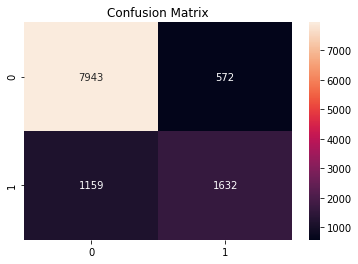

In [76]:
sb.heatmap(con_metric_lr, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

**OBSERVATION :** 
* Correct predicted vaules : 7944+1634 = 9578
* Incorrected preducted values : 1157+571 = 1728

In [77]:
print(metrics.classification_report(Y_test_pca,y_pred_pca))
# columns use : 20

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90      8515
         1.0       0.74      0.58      0.65      2791

    accuracy                           0.85     11306
   macro avg       0.81      0.76      0.78     11306
weighted avg       0.84      0.85      0.84     11306



### K-Nearest Neighbors after PCA

In [78]:
# use columns : 20
# n_neighbors : 9

classifier_KNN_pca = KNeighborsClassifier(n_neighbors=9)
classifier_KNN_pca.fit(X_train_pca, Y_train_pca)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [79]:
y_pred_pca = classifier_KNN_pca.predict(X_test_pca)

KNN_pca=metrics.accuracy_score(Y_test, y_pred_pca)
KNN_pca

0.841676985671325

**OBSERVATION :** Accuracy of K-Nearest Neighbors after PCA with 20 columns : 84.19%

In [80]:
pred_prob_knn = classifier_KNN_pca.predict_proba(X_test_pca)
np.around(pred_prob_knn, decimals = 2)

array([[1.  , 0.  ],
       [0.33, 0.67],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [81]:
con_metric_knn = metrics.confusion_matrix(Y_test_pca, y_pred_pca)
con_metric_knn

array([[7810,  705],
       [1085, 1706]])

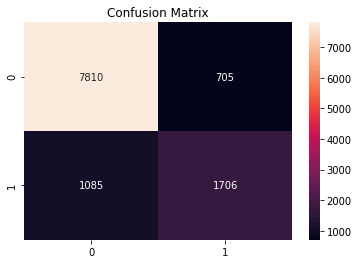

In [82]:
sb.heatmap(con_metric_knn, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

**OBSERVATION :** 
* Correct predicted vaules : 7813+1706 = 9519
* Incorrected preducted values : 1085+702 = 1787

In [83]:
print(metrics.classification_report(Y_test_pca,y_pred_pca))
# use columns : 20 

              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90      8515
         1.0       0.71      0.61      0.66      2791

    accuracy                           0.84     11306
   macro avg       0.79      0.76      0.78     11306
weighted avg       0.84      0.84      0.84     11306



### Decision Tree after PCA :

In [84]:
# use column :20
# max_depth : 4

classifier_DT_pca = DecisionTreeClassifier(max_depth=4)
classifier_DT_pca.fit(X_train_pca, Y_train_pca)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [85]:
y_pred_pca = classifier_DT_pca.predict(X_test_pca)

DT_pca=metrics.accuracy_score(Y_test_pca, y_pred_pca)
DT_pca

0.822041393950115

**OBSERVATION :** Accuracy of Decisition Tree after PCA with 20 colmns : 82.20%

In [86]:
pred_prob_DT = classifier_DT_pca.predict_proba(X_test_pca)
np.around(pred_prob_DT, decimals = 2)

array([[0.98, 0.02],
       [0.52, 0.48],
       [0.93, 0.07],
       ...,
       [0.93, 0.07],
       [0.93, 0.07],
       [0.93, 0.07]])

In [87]:
con_metric_DT = metrics.confusion_matrix(Y_test_pca, y_pred_pca)
con_metric_DT

array([[8124,  391],
       [1621, 1170]])

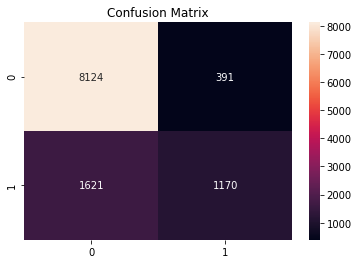

In [88]:
sb.heatmap(con_metric_DT, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

**OBSERVATION :** 
* Correct predicted vaules : 8124+1170 = 9294
* Incorrected preducted values : 1621+391 = 2012

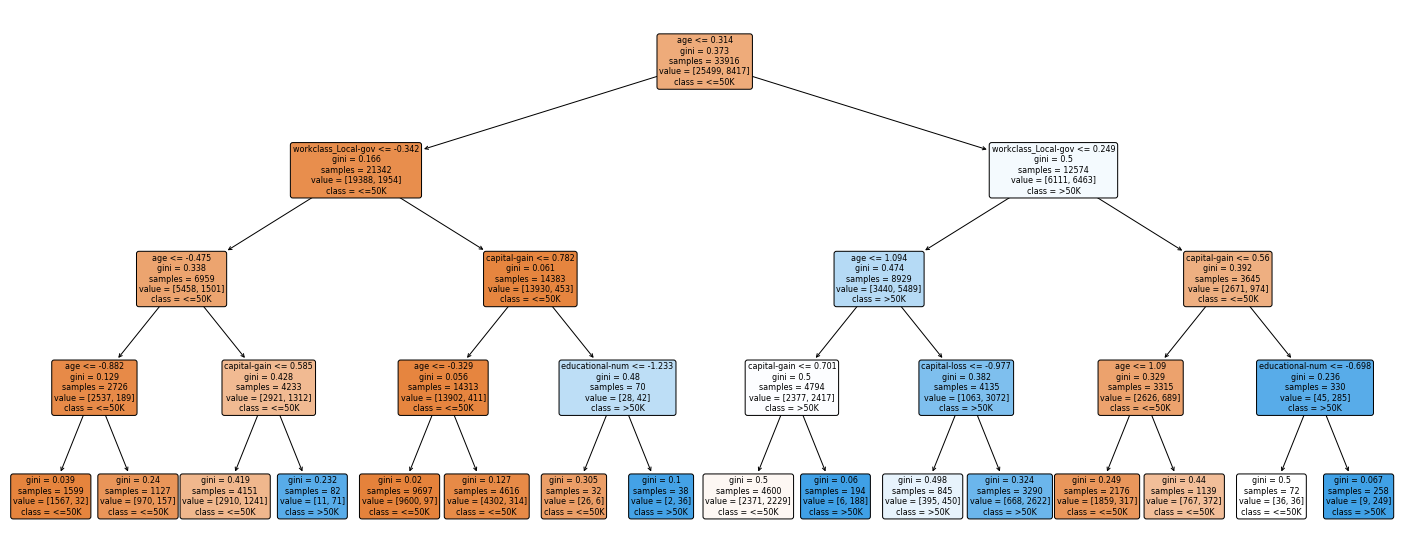

In [89]:
plt.figure(figsize=(25,10))
f = plot_tree(classifier_DT_pca, feature_names = X_train.columns, 
              class_names=['<=50K','>50K'] ,
              filled = True, 
              rounded = True, 
              fontsize = 8
             )

In [90]:
print(metrics.classification_report(Y_test_pca,y_pred_pca))
# columns use : 20

              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89      8515
         1.0       0.75      0.42      0.54      2791

    accuracy                           0.82     11306
   macro avg       0.79      0.69      0.71     11306
weighted avg       0.81      0.82      0.80     11306



### Support Vector Classification

In [91]:
# use columns :20

classifier_SVC_pca = SVC()
classifier_SVC_pca.fit(X_train_pca, Y_train_pca)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [92]:
y_pred_pca = classifier_SVC_pca.predict(X_test_pca)

SVC_pca=metrics.accuracy_score(Y_test_pca, y_pred_pca)
SVC_pca

0.8534406509817796

**OBSERVATION :** Accuracy of Support Vector Classifiction after PCA with 20 colmns : 85.34%

In [93]:
con_metric_svc = metrics.confusion_matrix(Y_test_pca, y_pred_pca)
con_metric_svc

array([[8039,  476],
       [1181, 1610]])

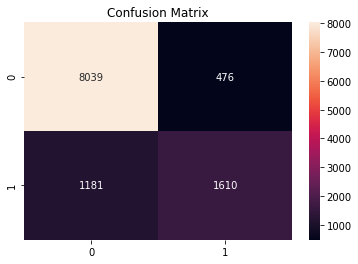

In [94]:
sb.heatmap(con_metric_svc, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

**OBSERVATION :** 
* Correct predicted vaules : 8038+1611 = 9649
* Incorrected preducted values : 1180+477 =1657

In [95]:
print(metrics.classification_report(Y_test_pca,y_pred_pca))
# columns use : 20

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91      8515
         1.0       0.77      0.58      0.66      2791

    accuracy                           0.85     11306
   macro avg       0.82      0.76      0.78     11306
weighted avg       0.85      0.85      0.85     11306



**Accuracy Table after PCA (columns=20)**

In [96]:
d_acc={}
Lable=["Logistic Regression","KNN","Decision Tree","SVC"]
Accuracy=[Logistic_reg_pca,KNN_pca,DT_pca,SVC_pca]
for i in range(4):
  d_acc[Lable[i]]=round((Accuracy[i]*100),2)
d_acc
acc_df_pca=pd.DataFrame.from_dict(d_acc,orient='index',columns=['Accuracy_PCA (col=20)'])
acc_df_pca

,Accuracy_PCA (col=20)
Logistic Regression,84.69
KNN,84.17
Decision Tree,82.20
SVC,85.34


### Conclusion Table :

In [97]:
acc_table=pd.concat([acc_df,df_rfe,acc_df_pca],axis=1)
acc_table=acc_table.fillna('-')
acc_table

,Accuracy (col=95),Accuracy_RFE (col=25),Accuracy_PCA (col=20)
Logistic Regression,85.11,84.18,84.69
KNN,84.40,-,84.17
Decision Tree,84.12,-,82.20
SVC,85.33,-,85.34
